In [1]:
import pandas as pd

# Load the dataset
file_path = 'Resources/Diabetes_Data.csv'
df = pd.read_csv('Resources/Diabetes_Data.csv')

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Handle missing values
df.fillna(df.median(), inplace=True)

In [4]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [5]:
# Define features and target variable
X = df[['HighBP', 'GenHlth', 'Education', 'Income',]]
y = df['Diabetes_binary']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [9]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8595474613686535
Confusion Matrix:
[[42954   785]
 [ 6341   656]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43739
         1.0       0.46      0.09      0.16      6997

    accuracy                           0.86     50736
   macro avg       0.66      0.54      0.54     50736
weighted avg       0.81      0.86      0.82     50736



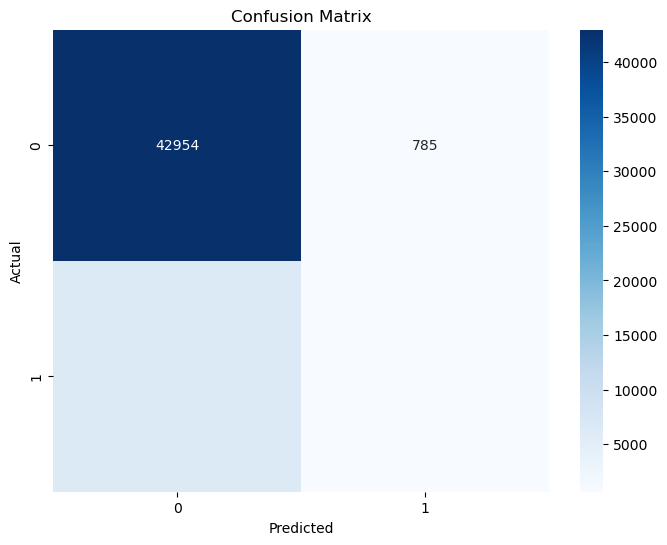

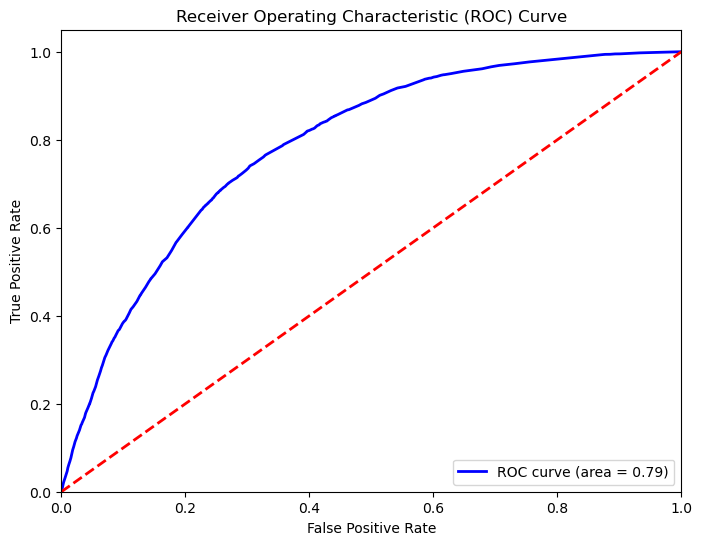

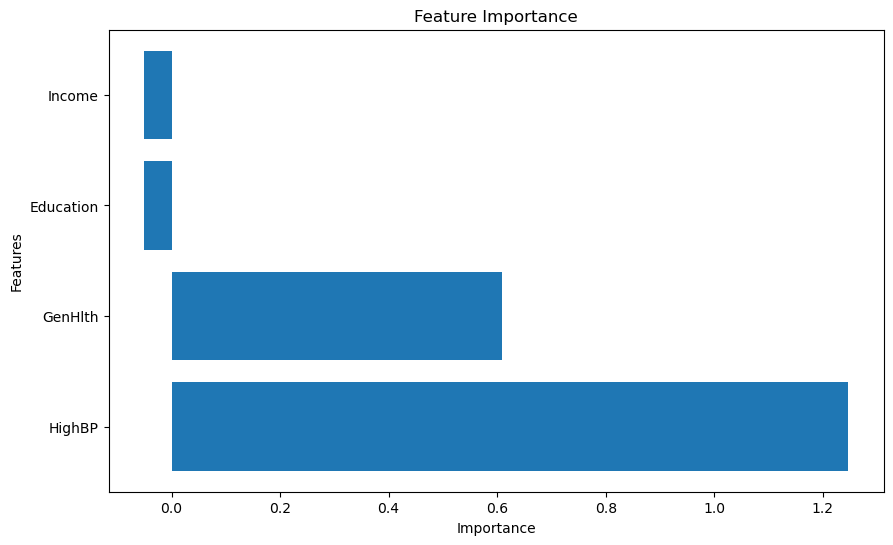

In [10]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Visualization
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization
features = X.columns
importance = model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()